In [181]:
#Import modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics

#Read CSV file
data = pd.read_csv("C:\\Users\\oliva\\Desktop\\Python_Tutorials\\python_ml-master\\sample_datasets\\headbrain.csv")
data.head(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [182]:
#Split data into x & y. .Values allow to convert the data into arrays, in order to reshape this to fit.
x= data["Head Size(cm^3)"].values.reshape(-1,1)
y= data["Brain Weight(grams)"].values.reshape(-1,1)

data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


Text(0, 0.5, 'Brain Weight(grams)')

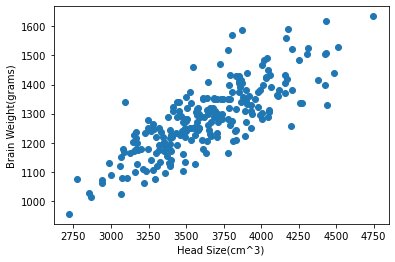

In [183]:
plt.scatter(x,y)
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")

In [223]:
#Import Linear regession module
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Train_test Model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#Model Fitting
model_fit = model.fit(x_train,y_train)

#Fitting model
pred = model_fit.predict([[400]]) #pass 1 sample with 1 feature
pred

array([[438.68888227]])

In [217]:
#Testing the model
xnew = np.linspace(2720,4747,237) #generate 237 numbers between 2720 and 4747 that are evenly spaced- np.linespace(start,stop,num)
ypred = model.predict(xnew.reshape(237,-1))

In [218]:
#To retrieve the intercept:
print("intercept: ",model.intercept_)

#For retrieving the slope:
print("slope: ",model.coef_[0])

#creating actual results base from linear formula
yactual = (0.26106902*xnew)+334.26127335 #base from formula y=mx+b

intercept:  [334.26127335]
slope:  [0.26106902]


In [224]:
#Evaluate goodness of fit

print("R2: ",r2_score(yactual,ypred)) #score is close to 1 meaning the model able to fit
print("MAE: ",mean_absolute_error(yactual,ypred)) #the closer to 0 the better. Means that the predicted value from actual value is not far off.

R2:  0.9999999999999968
MAE:  8.612240373108397e-06


In [243]:
#Actual Vs Predicted

#Converting into data frame
df = pd.DataFrame({"Actual":yactual.flatten(),"Predicted":ypred.flatten()})
df.head()

,Actual,Predicted
0,1044.369008,1044.369014
1,1046.611325,1046.611331
2,1048.853643,1048.853649
3,1051.095960,1051.095966
4,1053.338277,1053.338284
...,...,...
232,1564.586642,1564.586653
233,1566.828959,1566.828970
234,1569.071277,1569.071287
235,1571.313594,1571.313605


In [262]:
#Export file
df.to_csv("C:\\Users\\oliva\\Desktop\\Python_Tutorials\\python_ml-master\\sample_datasets\\actual_vs_predicted.csv") #file location on where to save

In [266]:
export_result= pd.read_csv("C:\\Users\\oliva\\Desktop\\Python_Tutorials\\python_ml-master\\sample_datasets\\actual_vs_predicted.csv")
export_result.drop(columns=["Unnamed: 0"])

,Actual,Predicted
0,1044.369008,1044.369014
1,1046.611325,1046.611331
2,1048.853643,1048.853649
3,1051.095960,1051.095966
4,1053.338277,1053.338284
...,...,...
232,1564.586642,1564.586653
233,1566.828959,1566.828970
234,1569.071277,1569.071287
235,1571.313594,1571.313605
